# 爬蟲(股價量)

In [1]:
#https://aronhack.com/zh/retrieve-stock-historical-data-with-python-and-yahoo-finance-api/
#https://blog.techbridge.cc/2020/09/21/python-pandas-zen-tutorial/
import requests
import numpy as np
import yfinance as yf
import pandas as pd
import time
import urllib.request as request
import json
stock_list=['2603']
# 開始爬蟲
historical_data = pd.DataFrame()
for i in stock_list:    
    
    # 抓取股票資料
    stock_id = i + '.TW'
    data = yf.Ticker(stock_id)
    df = data.history(period="max")

    # 在表格中增加股票代號
    df['STOCK_ID'] = i
    
    # 將資料格式化
    stock = pd.DataFrame(df)

    # 將df與一開始的空表格合併成一張完整表格
    historical_data = pd.concat([historical_data, stock])
    
    # 記得爬蟲禮儀
    time.sleep(0.8)
historical_data



,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCK_ID
Date,,,,,,,,
2000-01-04,7.214513,7.350636,7.132840,7.350636,17447178,0.0,0.0,2603
2000-01-05,7.323411,7.350635,7.132839,7.268960,13205004,0.0,0.0,2603
2000-01-06,7.268960,7.486757,7.241736,7.459533,22311061,0.0,0.0,2603
2000-01-07,7.922350,7.976802,7.731777,7.976802,55252396,0.0,0.0,2603
2000-01-10,8.085699,8.085699,7.813453,7.895126,29083459,0.0,0.0,2603
...,...,...,...,...,...,...,...,...
2021-06-30,181.500000,197.000000,181.500000,197.000000,124635805,0.0,0.0,2603
2021-07-01,204.000000,216.000000,195.000000,213.000000,164144137,0.0,0.0,2603
2021-07-02,213.000000,219.000000,200.000000,206.500000,543116488,0.0,0.0,2603


# 抓取時間區段

In [3]:
from datetime import date
from dateutil.rrule import rrule, DAILY

#時間抓取設定
start_date = date(2021, 6, 1)
end_date = date(2021, 7, 5)
period=[]
for i in rrule(DAILY, dtstart=start_date, until=end_date):
    period.append(i)
    

# 爬蟲(三大法人)

In [4]:
import sqlite3
import os
import requests
from io import StringIO
import pandas as pd
import time

In [5]:
institutional_investor_data = pd.DataFrame()
for i in period:
    # 將時間物件轉為字串以代入網址
    ii = i.strftime('%Y%m%d')
    try:
        r = requests.get('http://www.tse.com.tw/fund/T86?response=csv&date='+ii+'&selectType=ALLBUT0999')
        time.sleep(15)
    except:
        continue
    
    # 檔取csv
    try:
        df = pd.read_csv(StringIO(r.text), header=1).dropna(how='all', axis=1).dropna(how='any')

    
        # 將資料格式化
        stock = pd.DataFrame(df)
        
        # 將時間物件放入list
        cc = []
        for g in range(len(stock)):
            cc.append(i)
            
        # 將時間list作為DataFrame的index
        stock.index = cc
        
        # 將df與一開始的空表格合併成一張完整表格
        institutional_investor_data = pd.concat([institutional_investor_data, stock])
    except:
        continue


In [108]:
# 未整理資料
dff=institutional_investor_data
dff

,證券代號,證券名稱,外陸資買進股數(不含外資自營商),外陸資賣出股數(不含外資自營商),外陸資買賣超股數(不含外資自營商),外資自營商買進股數,外資自營商賣出股數,外資自營商買賣超股數,投信買進股數,投信賣出股數,投信買賣超股數,自營商買賣超股數,自營商買進股數(自行買賣),自營商賣出股數(自行買賣),自營商買賣超股數(自行買賣),自營商買進股數(避險),自營商賣出股數(避險),自營商買賣超股數(避險),三大法人買賣超股數
2021-06-01,"=""00677U""",期富邦VIX,"3,862,000","15,605,000","-11,743,000",0,0,0,0,0,0,"181,018,000",0,0,0,"181,374,000","356,000","181,018,000","169,275,000"
2021-06-01,2603,長榮,"47,338,328","28,069,686","19,268,642",0,0,0,0,"959,000","-959,000","1,701,339","3,427,339","3,376,000","51,339","3,708,000","2,058,000","1,650,000","20,010,981"
2021-06-01,2609,陽明,"50,948,130","34,751,950","16,196,180",0,0,0,"632,000","1,272,000","-640,000","820,630","1,614,630","1,471,000","143,630","695,000","18,000","677,000","16,376,810"
2021-06-01,"=""00715L""",期街口布蘭特正2,"2,844,000","2,182,000","662,000",0,0,0,0,0,0,"12,732,000",0,0,0,"13,897,000","1,165,000","12,732,000","13,394,000"
2021-06-01,2601,益航,"13,115,000","2,817,000","10,298,000",0,0,0,0,0,0,"296,000",0,"2,000","-2,000","298,000",0,"298,000","10,594,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05,"=""00885""",富邦越南,"449,000","4,108,000","-3,659,000",0,0,0,0,0,0,"-7,169,124",0,0,0,"846,000","8,015,124","-7,169,124","-10,828,124"
2021-07-05,"=""00632R""",元大台灣50反1,"2,559,000","459,000","2,100,000",0,0,0,0,0,0,"-23,369,580","800,000","500,000","300,000","21,676,000","45,345,580","-23,669,580","-21,269,580"
2021-07-05,"=""00637L""",元大滬深300正2,"3,363,000","5,560,000","-2,197,000",0,0,0,0,0,0,"-24,642,995",0,0,0,"3,758,100","28,401,095","-24,642,995","-26,839,995"
2021-07-05,"=""00882""",中信中國高股息,"2,188,050","5,339,000","-3,150,950",0,0,0,0,0,0,"-25,953,677",0,0,0,"42,000","25,995,677","-25,953,677","-29,104,627"


In [109]:
#整理資料
dff=institutional_investor_data

# 刪除逗點
dff = dff.astype(str).apply(lambda s: s.str.replace(',',''))

# 將dataframe的型態轉成數字
dff.apply(lambda s: pd.to_numeric(s, errors='coerce')).dropna(how='all', axis=1)

# 刪除「證券代號」中的「"」和「=」
dff['stock_id'] = dff['證券代號'].str.replace('=','').str.replace('"','')

# 刪除「證券代號」這個欄位
dff = dff.drop(['證券代號'], axis=1)



In [133]:
#整理後資料
dff

,證券名稱,外陸資買進股數(不含外資自營商),外陸資賣出股數(不含外資自營商),外陸資買賣超股數(不含外資自營商),外資自營商買進股數,外資自營商賣出股數,外資自營商買賣超股數,投信買進股數,投信賣出股數,投信買賣超股數,自營商買賣超股數,自營商買進股數(自行買賣),自營商賣出股數(自行買賣),自營商買賣超股數(自行買賣),自營商買進股數(避險),自營商賣出股數(避險),自營商買賣超股數(避險),三大法人買賣超股數,stock_id
2021-06-01,期富邦VIX,3862000,15605000,-11743000,0.0,0.0,0.0,0,0,0,181018000,0,0,0,181374000,356000,181018000,169275000,00677U
2021-06-01,長榮,47338328,28069686,19268642,0.0,0.0,0.0,0,959000,-959000,1701339,3427339,3376000,51339,3708000,2058000,1650000,20010981,2603
2021-06-01,陽明,50948130,34751950,16196180,0.0,0.0,0.0,632000,1272000,-640000,820630,1614630,1471000,143630,695000,18000,677000,16376810,2609
2021-06-01,期街口布蘭特正2,2844000,2182000,662000,0.0,0.0,0.0,0,0,0,12732000,0,0,0,13897000,1165000,12732000,13394000,00715L
2021-06-01,益航,13115000,2817000,10298000,0.0,0.0,0.0,0,0,0,296000,0,2000,-2000,298000,0,298000,10594000,2601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05,富邦越南,449000,4108000,-3659000,0.0,0.0,0.0,0,0,0,-7169124,0,0,0,846000,8015124,-7169124,-10828124,00885
2021-07-05,元大台灣50反1,2559000,459000,2100000,0.0,0.0,0.0,0,0,0,-23369580,800000,500000,300000,21676000,45345580,-23669580,-21269580,00632R
2021-07-05,元大滬深300正2,3363000,5560000,-2197000,0.0,0.0,0.0,0,0,0,-24642995,0,0,0,3758100,28401095,-24642995,-26839995,00637L
2021-07-05,中信中國高股息,2188050,5339000,-3150950,0.0,0.0,0.0,0,0,0,-25953677,0,0,0,42000,25995677,-25953677,-29104627,00882


In [138]:
#挑選股票與時段
def pick(stock_number, period_start, period_end):
    global historical_data
    aaa = historical_data['STOCK_ID'] == stock_number
    aaa = historical_data[aaa].loc[period_start : period_end]
    
    global dff
    a = []
    b = []
    c = []
    d = []
    for i in range(len(dff)):
        if dff['stock_id'][i] == aaa['STOCK_ID'][0]:
            for g in range(len(aaa)):
                if dff.index[i] == aaa.index[g]:
                    a.append(int(dff['外陸資買賣超股數(不含外資自營商)'][i]))
                    b.append(int(dff['投信買賣超股數'][i]))
                    c.append(int(dff['自營商買賣超股數'][i]))
                    d.append(int(dff['外陸資買賣超股數(不含外資自營商)'][i])+
                             int(dff['投信買賣超股數'][i])+
                             int(dff['自營商買賣超股數'][i]))
            
    aaa['外資買賣超']=a
    aaa['投信買賣超']=b
    aaa['自營商買賣超']=c
    aaa['三大法人買賣超']=d
    return aaa




# 用函式定義標的
s2603 = pick('2603', '2021-06-01', '2021-07-05')

In [139]:
s2603

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCK_ID,外資買賣超,投信買賣超,自營商買賣超,三大法人買賣超
Date,,,,,,,,,,,,
2021-06-01,101.5,108.0,98.199997,108.0,541672878,0.0,0.0,2603,19268642,-959000,1701339,20010981
2021-06-02,110.0,115.5,108.500000,110.5,693225367,0.0,0.0,2603,-22588534,6603000,1849956,-14135578
2021-06-03,114.0,121.0,112.500000,119.0,560680464,0.0,0.0,2603,28921419,1609000,2923527,33453946
2021-06-04,119.0,121.5,116.000000,116.5,440160977,0.0,0.0,2603,-26475300,-1049000,1488355,-26035945
2021-06-07,119.0,120.5,105.000000,110.5,668225395,0.0,0.0,2603,-16148869,1323000,2956800,-11869069
2021-06-08,110.5,116.0,110.500000,115.5,330123353,0.0,0.0,2603,9931266,-622000,-8542,9300724
2021-06-09,120.0,120.5,114.000000,116.0,476515319,0.0,0.0,2603,-8683906,-43000,-1406817,-10133723
2021-06-10,117.5,118.5,108.000000,113.5,459157011,0.0,0.0,2603,-5811863,-1150000,1838585,-5123278
2021-06-11,115.5,124.0,114.000000,124.0,556817954,0.0,0.0,2603,31686519,-432000,1862865,33117384


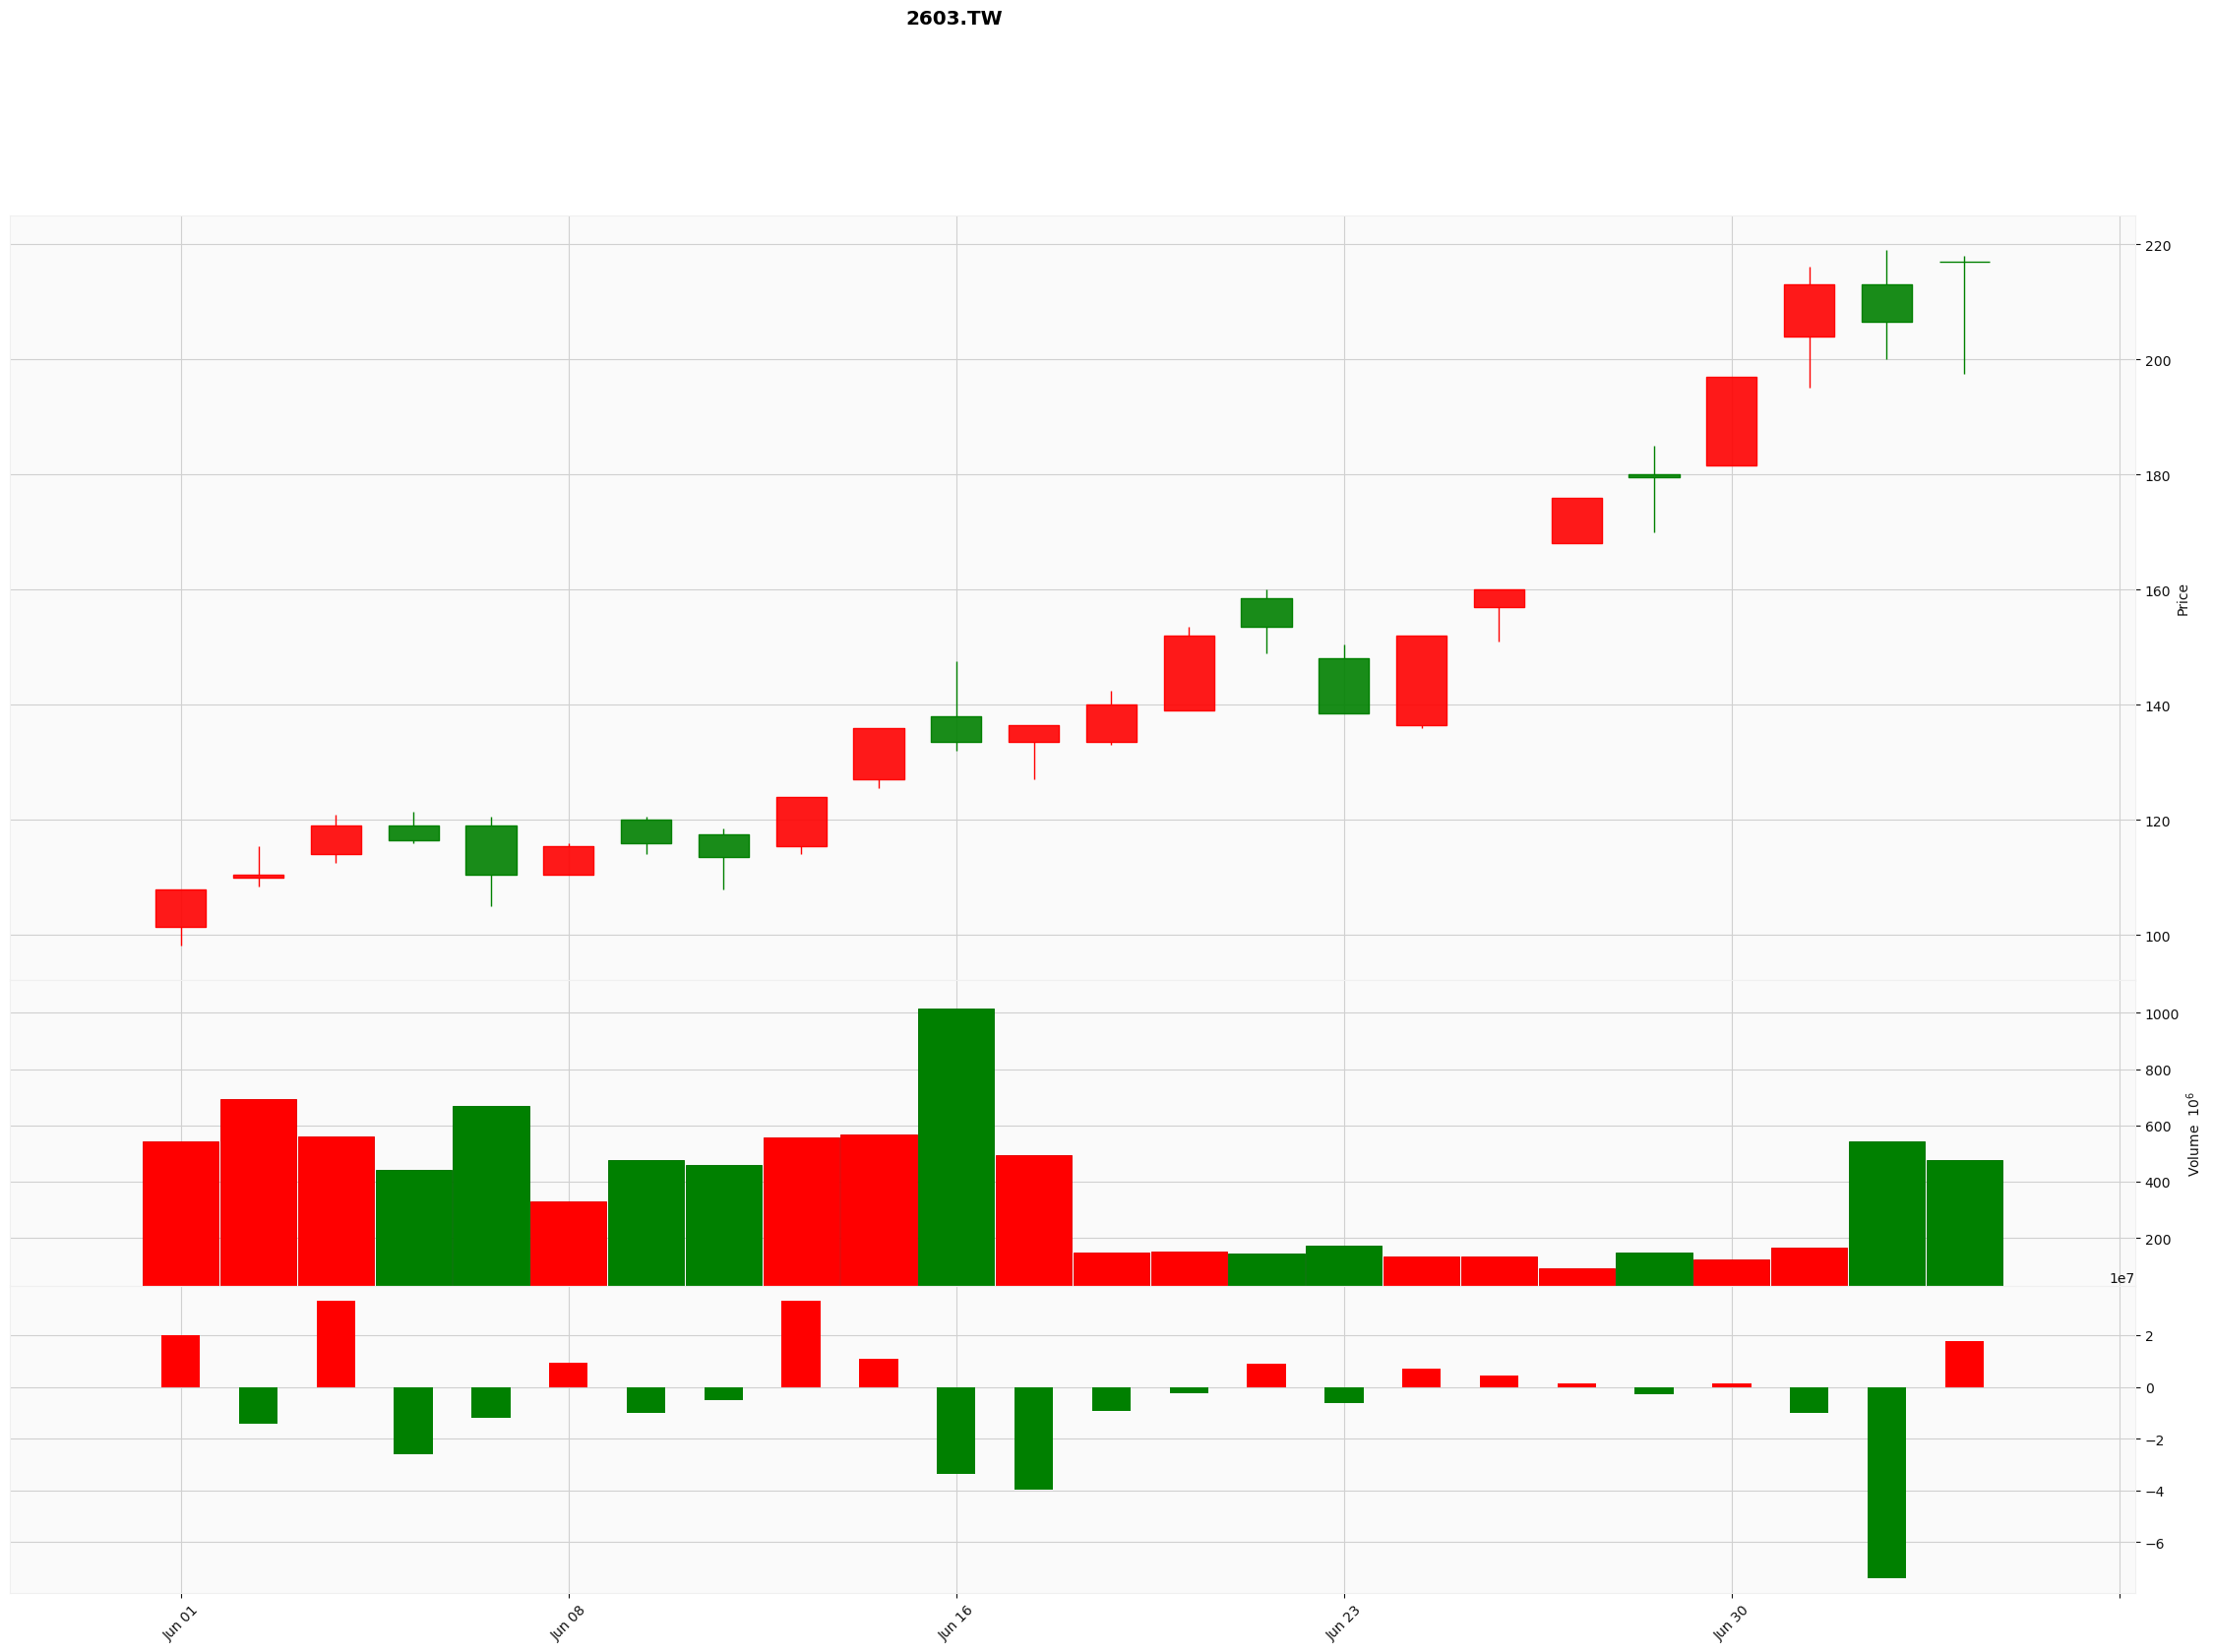

In [141]:
import mplfinance as mpf

# 設定顏色
mc = mpf.make_marketcolors(up='r',
                           down='g',
                           edge='',
                           wick='inherit',
                           volume='inherit')

# 設定樣式
s = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)


# 將買賣超分開才能分顏色
q=[]
for i in range(len(s2603['三大法人買賣超'])):
    if s2603['三大法人買賣超'][i] > 0 :
        q.append(s2603['三大法人買賣超'][i])
    else:
        q.append(None)
        
qq=[]
for g in range(len(s2603['三大法人買賣超'])):
    if s2603['三大法人買賣超'][g] <= 0 :
        qq.append(s2603['三大法人買賣超'][g])
    else:
        qq.append(None)

foreign_inventor_positive=pd.DataFrame(q)
foreign_inventor_negative=pd.DataFrame(qq)



# 加入買賣超副表
add_plot = [mpf.make_addplot(foreign_inventor_positive, width=0.5, panel=2, color='r', type='bar'),
            mpf.make_addplot(foreign_inventor_negative, width=0.5, panel=2, color='g', type='bar'),]

kwargs = dict(type='candle', volume=True, figsize=(30,20), title='2603.TW', style=s, addplot=add_plot)
mpf.plot(s2603, **kwargs)